In [48]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as  sns

In [49]:
iris=load_iris()

In [50]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [51]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [52]:
df=pd.DataFrame(iris.data)

In [53]:
df.rename(columns={0:'sepalLength',1:"sepalWidth",2:"petalLength",3:"petalWidth"},inplace=True)

In [54]:
df

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


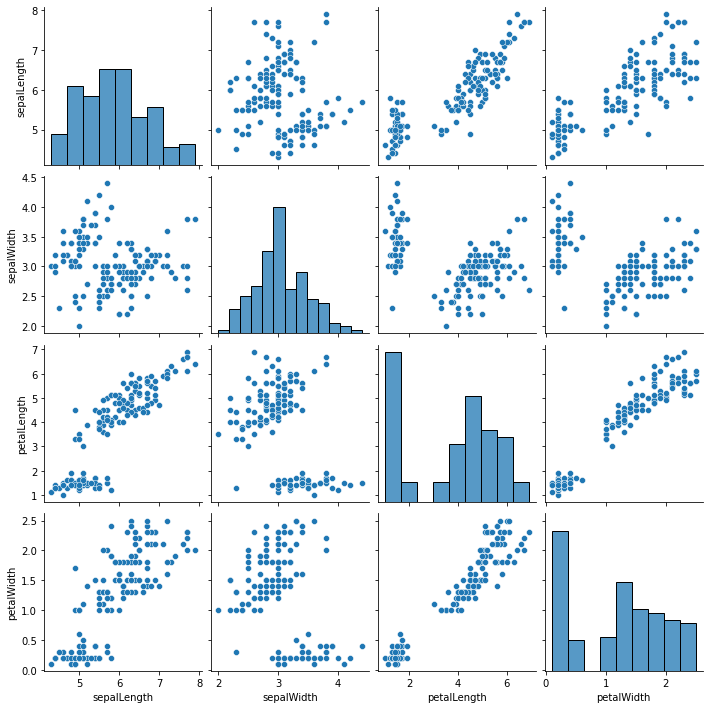

In [55]:
sns.pairplot(df[['sepalLength','sepalWidth','petalLength','petalWidth']])
plt.show()

In [56]:
from sklearn.cluster import KMeans

In [57]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k,n_init=10)
    km.fit_predict(df[['petalLength','petalWidth','sepalLength','sepalWidth']])
    sse.append(km.inertia_)

In [58]:
sse

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.03998724608726,
 34.4201917862839,
 29.99042640692641,
 27.90805453852021]

plt.plot(k_range,sse)
plt.show()

In [59]:
km.labels_

array([0, 8, 8, 8, 0, 6, 8, 0, 8, 8, 6, 0, 8, 8, 6, 6, 6, 0, 6, 0, 0, 0,
       8, 0, 0, 8, 0, 0, 0, 8, 8, 0, 6, 6, 8, 8, 0, 0, 8, 0, 0, 8, 8, 0,
       0, 8, 0, 8, 0, 0, 7, 7, 7, 3, 7, 3, 7, 5, 7, 3, 5, 3, 3, 7, 3, 7,
       3, 3, 1, 3, 1, 3, 1, 7, 7, 7, 7, 7, 7, 5, 5, 5, 3, 1, 3, 7, 7, 7,
       3, 3, 3, 7, 3, 5, 3, 3, 3, 7, 5, 3, 4, 1, 4, 4, 4, 2, 3, 2, 4, 2,
       4, 1, 4, 1, 1, 4, 4, 2, 2, 1, 4, 1, 2, 1, 4, 2, 1, 1, 4, 4, 2, 2,
       4, 1, 1, 2, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1], dtype=int32)

In [60]:
df['target']=km.labels_

In [61]:
df

,sepalLength,sepalWidth,petalLength,petalWidth,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,8
2,4.7,3.2,1.3,0.2,8
3,4.6,3.1,1.5,0.2,8
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


In [62]:
km.inertia_

27.90805453852021

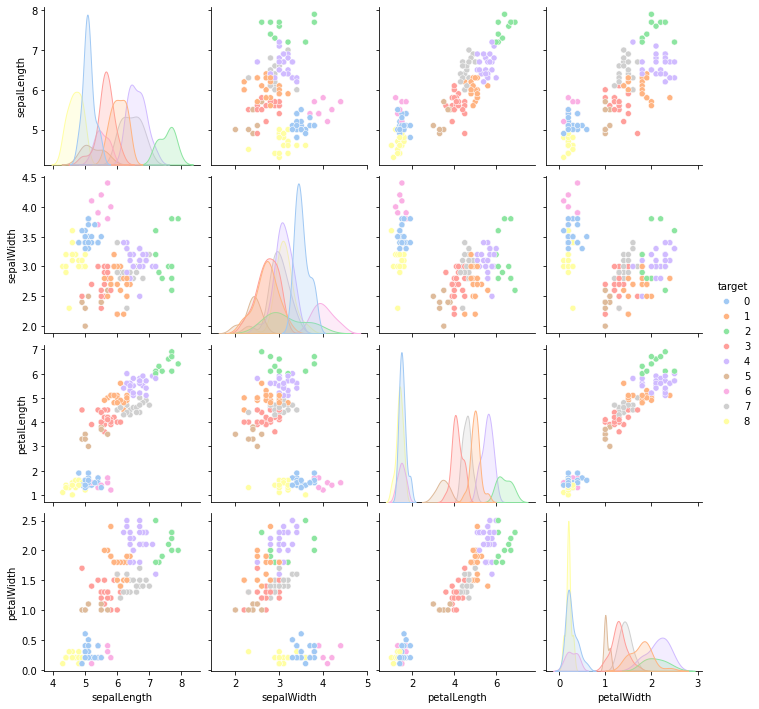

In [64]:
sns.pairplot(df,hue='target',vars=['sepalLength','sepalWidth','petalLength','petalWidth'],palette='pastel')

In [66]:
df1=df[df['target']==0]
df2=df[df['target']==1]
df3=df[df['target']==2]

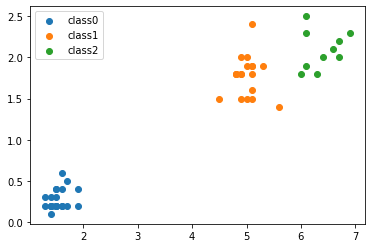

In [68]:
plt.scatter(x=df1['petalLength'],y=df1['petalWidth'],label='class0')
plt.scatter(x=df2['petalLength'],y=df2['petalWidth'],label='class1')
plt.scatter(x=df3['petalLength'],y=df3['petalWidth'],label='class2')
plt.legend()

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['sepalLength']=scaler.fit_transform(df[['sepalLength']])
df['petalLength']=scaler.fit_transform(df[['petalLength']])
df['sepalWidth']=scaler.fit_transform(df[['sepalWidth']])
df['petalWidth']=scaler.fit_transform(df[['petalWidth']])

In [74]:
df

,sepalLength,sepalWidth,petalLength,petalWidth,target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,8
2,0.111111,0.500000,0.050847,0.041667,8
3,0.083333,0.458333,0.084746,0.041667,8
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,4
146,0.555556,0.208333,0.677966,0.750000,1
147,0.611111,0.416667,0.711864,0.791667,4
148,0.527778,0.583333,0.745763,0.916667,4


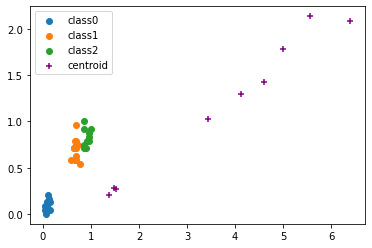

In [81]:
df1=df[df['target']==0]
df2=df[df['target']==1]
df3=df[df['target']==2]
plt.scatter(x=df1['petalLength'],y=df1['petalWidth'],label='class0')
plt.scatter(x=df2['petalLength'],y=df2['petalWidth'],label='class1')
plt.scatter(x=df3['petalLength'],y=df3['petalWidth'],label='class2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label="centroid")
plt.legend()

In [84]:
from sklearn.metrics import silhouette_score
silhouette_score(df[['sepalLength','sepalWidth','petalLength','petalWidth']],km.labels_)

0.3025289224835044